# Preprocessing

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import utils

## Reading Data

In [25]:
FILE_PATH = "data/balance_sheets_quarterly.csv"
df = pd.read_csv(FILE_PATH)

df.head()

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,cashAndCashEquivalents,shortTermInvestments,...,totalEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt,link,finalLink,marketCap
0,2024-06-30,PEO.WA,PLN,0,2024-06-30,2024-06-28 20:00:00,2024,Q2,1.552300e+10,-2.850300e+10,...,2.822300e+10,3.160460e+11,12000000.0,3.160460e+11,4.920000e+08,1.981900e+10,4.296000e+09,NaN,NaN,4.401600e+10
1,2024-03-31,PEO.WA,PLN,0,2024-03-31,2024-03-30 20:00:00,2024,Q1,1.691600e+10,0.000000e+00,...,3.168300e+10,3.173690e+11,13000000.0,3.173690e+11,1.266490e+11,2.042600e+10,3.510000e+09,NaN,NaN,4.764470e+10
2,2023-12-31,PEO.WA,PLN,0,2023-12-31,2023-12-30 19:00:00,2023,Q4,1.473300e+10,0.000000e+00,...,3.034100e+10,3.057230e+11,12000000.0,3.057230e+11,1.198370e+11,1.858300e+10,3.850000e+09,NaN,NaN,3.983710e+10
3,2023-09-30,PEO.WA,PLN,0,2023-09-30,2023-09-29 20:00:00,2023,Q3,1.131247e+10,0.000000e+00,...,2.833568e+10,3.099348e+11,12009000.0,3.099348e+11,1.210954e+11,1.808865e+10,6.776180e+09,NaN,NaN,2.649635e+10
4,2023-06-30,PEO.WA,PLN,0,2023-06-30,2023-06-29 20:00:00,2023,Q2,9.912213e+09,0.000000e+00,...,2.596572e+10,2.879213e+11,11270000.0,2.879213e+11,1.033854e+11,1.606473e+10,6.152515e+09,NaN,NaN,2.908168e+10


In [26]:
len(df.columns)

55

## Dropping Unnecessary Data

### Drop rows where the reported currency is different from PLN

In [27]:
df = df[df["reportedCurrency"] == "PLN"]

### Drop columns that are completely useless for your analysis

In [28]:
columns_to_drop = [
    "reportedCurrency",
    "cik",
    "fillingDate",
    "acceptedDate",
    "calendarYear",
    "finalLink",
    "link",
    "period",
]

existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df = df.drop(columns=existing_columns_to_drop)

df.head()

,date,symbol,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,...,othertotalStockholdersEquity,totalStockholdersEquity,totalEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt,marketCap
0,2024-06-30,PEO.WA,1.552300e+10,-2.850300e+10,-1.298000e+10,1.277000e+09,1.170300e+10,2.577700e+10,2.577700e+10,1.985000e+09,...,8.142000e+09,2.821100e+10,2.822300e+10,3.160460e+11,12000000.0,3.160460e+11,4.920000e+08,1.981900e+10,4.296000e+09,4.401600e+10
1,2024-03-31,PEO.WA,1.691600e+10,0.000000e+00,1.691600e+10,1.201000e+09,-2.881800e+10,2.881800e+10,1.811700e+10,1.976000e+09,...,2.171900e+10,3.167000e+10,3.168300e+10,3.173690e+11,13000000.0,3.173690e+11,1.266490e+11,2.042600e+10,3.510000e+09,4.764470e+10
2,2023-12-31,PEO.WA,1.473300e+10,0.000000e+00,1.473300e+10,3.460000e+09,-2.820500e+10,2.820500e+10,1.819300e+10,1.946000e+09,...,9.166000e+09,3.032900e+10,3.034100e+10,3.057230e+11,12000000.0,3.057230e+11,1.198370e+11,1.858300e+10,3.850000e+09,3.983710e+10
3,2023-09-30,PEO.WA,1.131247e+10,0.000000e+00,1.131247e+10,1.167578e+09,-2.361848e+10,2.361848e+10,1.248005e+10,1.769223e+09,...,7.961628e+09,2.832367e+10,2.833568e+10,3.099348e+11,12009000.0,3.099348e+11,1.210954e+11,1.808865e+10,6.776180e+09,2.649635e+10
4,2023-06-30,PEO.WA,9.912213e+09,0.000000e+00,9.912213e+09,1.142336e+09,-2.422956e+10,2.422956e+10,1.105455e+10,1.753399e+09,...,7.315545e+09,2.595445e+10,2.596572e+10,2.879213e+11,11270000.0,2.879213e+11,1.033854e+11,1.606473e+10,6.152515e+09,2.908168e+10


### Drop companies that have less than 2 years of data (8 quarters)

In [29]:
print("Companies before dropping:", len(df["symbol"].unique()))

min_quarters = 8
df = df.groupby('symbol').filter(lambda x: len(x) >= min_quarters)

print("Companies after dropping:", len(df["symbol"].unique()))

Companies before dropping: 396
Companies after dropping: 390


### Drop rows with missing values in the market cap column

In [30]:
print("Rows before dropping:", len(df), "Companies:", len(df["symbol"].unique()))

df = df.dropna(subset=["marketCap"])

print("Rows after dropping:", len(df), "Companies:", len(df["symbol"].unique()))

Rows before dropping: 18095 Companies: 390
Rows after dropping: 16920 Companies: 375


In [31]:
df.columns[df.isnull().any()].tolist() # There are no other missing values

[]

### Drop redundant columns that combined data from other columns

In [32]:
columns_to_drop = [
    "cashAndShortTermInvestments",
    "goodwillAndIntangibleAssets",
    "totalLiabilitiesAndStockholdersEquity",
    "totalLiabilitiesAndTotalEquity",
]

df = df.drop(columns=columns_to_drop)

## Removing very correlated features


Correlation Matrix:


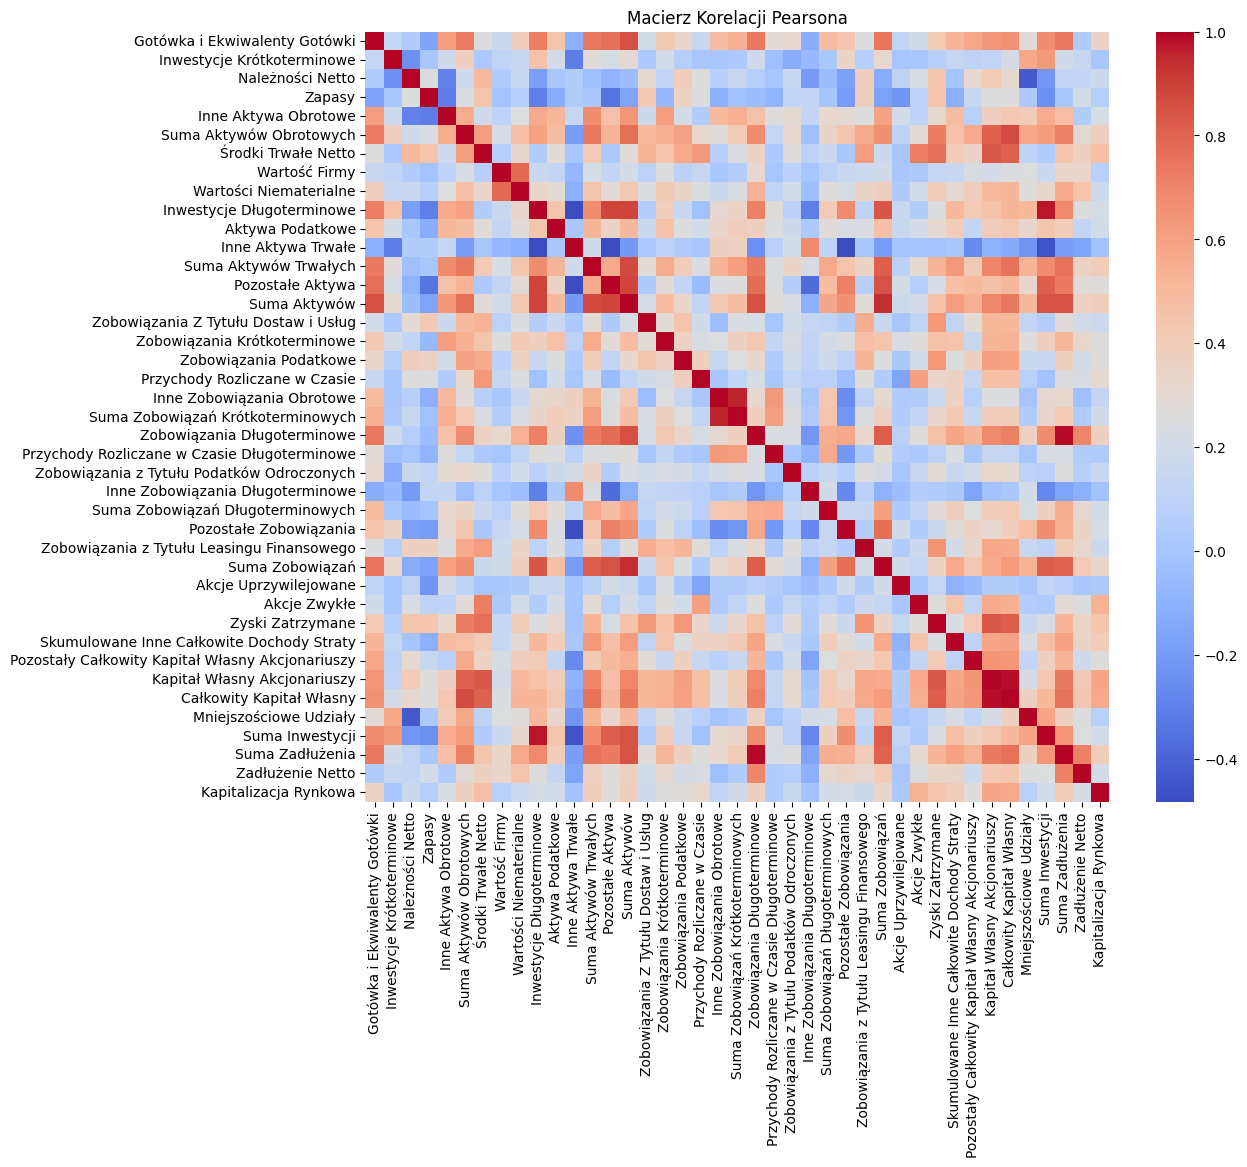

In [33]:
df_numeric = df.drop(columns=["symbol", "date"])

print("\nCorrelation Matrix:")
corr_matrix = df_numeric.corr(method="pearson")

corr_matrix_translated = corr_matrix.rename(
    columns=utils.translate_column, index=utils.translate_column
)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_translated, annot=False, cmap="coolwarm")
plt.title("Macierz Korelacji Pearsona")
plt.show()

### Dropping features with too high correlation

In [34]:
high_corr_threshold = 0.95

# Identify columns with high correlation (ignoring the diagonal)
high_corr_pairs = set()
for i in range(len(corr_matrix_translated.columns)):
    for j in range(i):
        if abs(corr_matrix_translated.iloc[i, j]) >= high_corr_threshold:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            high_corr_pairs.add((colname_i, colname_j))

high_corr_pairs

{('totalCurrentLiabilities', 'otherCurrentLiabilities'),
 ('totalDebt', 'longTermDebt'),
 ('totalEquity', 'totalStockholdersEquity'),
 ('totalInvestments', 'longTermInvestments')}

I decided to drop these features from pairs:

- otherCurrentLiabilities
- longTermDebt
- totalStockholdersEquity
- longTermInvestments

In [35]:
columns_to_drop = [
    "otherCurrentLiabilities",  # Keep totalCurrentLiabilities
    "longTermDebt",  # Keep totalDebt
    "totalStockholdersEquity",  # Keep totalEquity
    "longTermInvestments",  # Keep totalInvestments
]

df = df.drop(columns=columns_to_drop)
df_numeric = df.drop(columns=["symbol", "date"])

## Dropping least important features

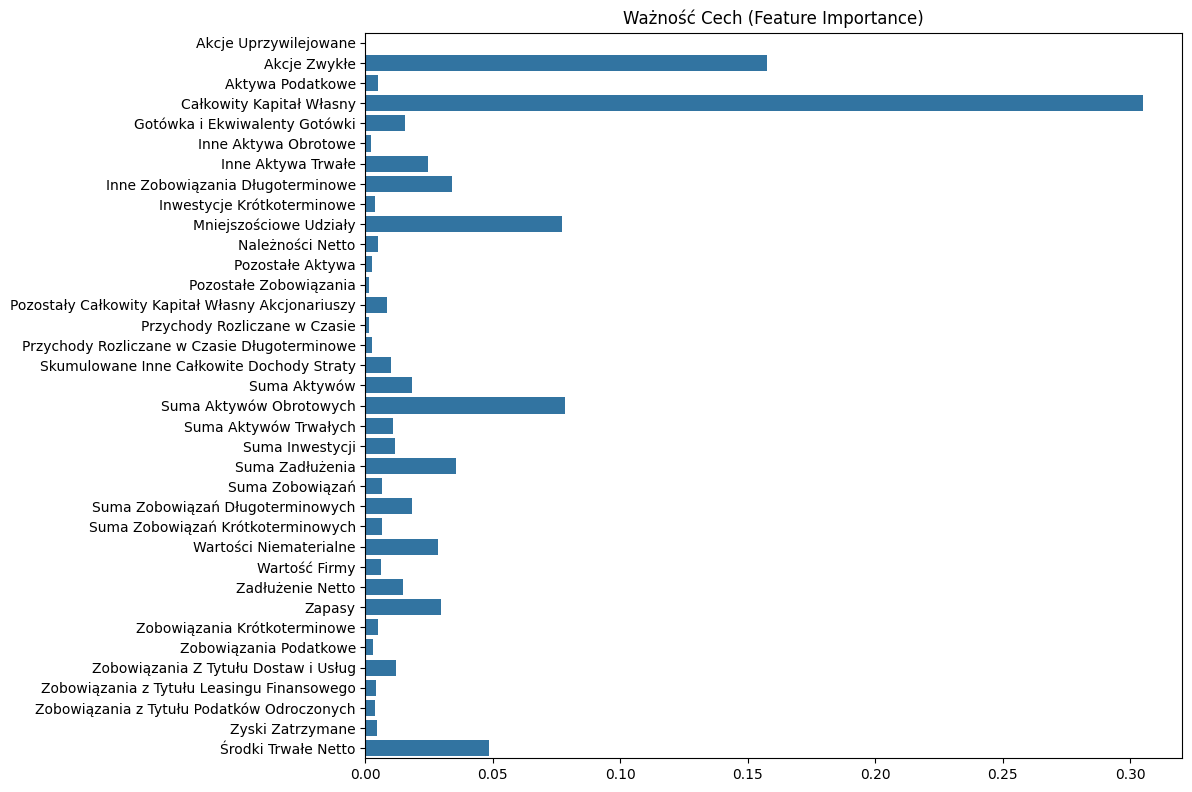

In [36]:
X = df_numeric.drop(columns=["marketCap"])
y = df["marketCap"]

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

importances = model.feature_importances_

feature_names_translated = [utils.translate_column(name) for name in X.columns]

features_and_importances = sorted(
    zip(feature_names_translated, importances), key=lambda x: x[0]
)

sorted_feature_names = [feature for feature, _ in features_and_importances]
sorted_importances = [importance for _, importance in features_and_importances]

plt.figure(figsize=(12, 8))

sns.barplot(x=sorted_importances, y=sorted_feature_names)

plt.title("Ważność Cech (Feature Importance)")

plt.tight_layout(pad=1.0)  # Adds a little padding around the plot
plt.show()

In [37]:
importance_threshold = 0.005

dropped_features = [
    name
    for importance, name in zip(importances, X.columns)
    if importance < importance_threshold
]

print("Dropped features due to low importance:")
translations = [utils.translate_column(name) for name in dropped_features]
for name, translation in sorted(zip(dropped_features, translations), key=lambda x: x[1]):
    print(f"{translation} ({name})")

Dropped features due to low importance:
Akcje Uprzywilejowane (preferredStock)
Aktywa Podatkowe (taxAssets)
Inne Aktywa Obrotowe (otherCurrentAssets)
Inwestycje Krótkoterminowe (shortTermInvestments)
Należności Netto (netReceivables)
Pozostałe Aktywa (otherAssets)
Pozostałe Zobowiązania (otherLiabilities)
Przychody Rozliczane w Czasie (deferredRevenue)
Przychody Rozliczane w Czasie Długoterminowe (deferredRevenueNonCurrent)
Zobowiązania Krótkoterminowe (shortTermDebt)
Zobowiązania Podatkowe (taxPayables)
Zobowiązania z Tytułu Leasingu Finansowego (capitalLeaseObligations)
Zobowiązania z Tytułu Podatków Odroczonych (deferredTaxLiabilitiesNonCurrent)
Zyski Zatrzymane (retainedEarnings)


In [38]:
df_updated = df.drop(columns=dropped_features)

print(f"Original dataset shape: {df.shape}")
print(f"Updated dataset shape after dropping features: {df_updated.shape}")

Original dataset shape: (16920, 39)
Updated dataset shape after dropping features: (16920, 25)


In [39]:
df = df_updated
df

,date,symbol,cashAndCashEquivalents,inventory,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,otherNonCurrentAssets,totalNonCurrentAssets,...,totalLiabilities,commonStock,accumulatedOtherComprehensiveIncomeLoss,othertotalStockholdersEquity,totalEquity,minorityInterest,totalInvestments,totalDebt,netDebt,marketCap
0,2024-06-30,PEO.WA,1.552300e+10,1.170300e+10,2.577700e+10,1.985000e+09,749000000.0,1.667000e+09,2.841800e+11,2.902690e+11,...,2.878230e+11,262000000.0,1.533800e+10,8.142000e+09,2.822300e+10,12000000.0,4.920000e+08,1.981900e+10,4.296000e+09,4.401600e+10
1,2024-03-31,PEO.WA,1.691600e+10,-2.881800e+10,1.811700e+10,1.976000e+09,0.0,2.392000e+09,-1.217000e+09,1.310170e+11,...,2.042600e+10,262000000.0,-7.100000e+08,2.171900e+10,3.168300e+10,13000000.0,1.266490e+11,2.042600e+10,3.510000e+09,4.764470e+10
2,2023-12-31,PEO.WA,1.473300e+10,-2.820500e+10,1.819300e+10,1.946000e+09,749000000.0,1.647000e+09,-1.119000e+09,1.241790e+11,...,2.753820e+11,262000000.0,1.270600e+10,9.166000e+09,3.034100e+10,12000000.0,1.198370e+11,1.858300e+10,3.850000e+09,3.983710e+10
3,2023-09-30,PEO.WA,1.131247e+10,-2.361848e+10,1.248005e+10,1.769223e+09,0.0,2.339871e+09,-1.275007e+09,1.252045e+11,...,1.808865e+10,262470000.0,1.362838e+10,7.961628e+09,2.833568e+10,12009000.0,1.210954e+11,1.808865e+10,6.776180e+09,2.649635e+10
4,2023-06-30,PEO.WA,9.912213e+09,-2.422956e+10,1.105455e+10,1.753399e+09,748552000.0,1.538739e+09,-1.324246e+09,1.074261e+11,...,1.606473e+10,262470000.0,1.362086e+10,7.315545e+09,2.596572e+10,11270000.0,1.033854e+11,1.606473e+10,6.152515e+09,2.908168e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20372,2018-12-31,R22.WA,1.313200e+07,2.420000e+05,2.978200e+07,2.762500e+07,0.0,0.000000e+00,2.500000e+04,2.175430e+08,...,1.452680e+08,284000.0,0.000000e+00,-7.900000e+04,8.815900e+07,13898000.0,5.926000e+06,8.021400e+07,6.708200e+07,4.231600e+06
20373,2018-09-30,R22.WA,1.364800e+07,0.000000e+00,2.833900e+07,2.461100e+07,0.0,0.000000e+00,9.000000e+04,1.892120e+08,...,1.087590e+08,284000.0,0.000000e+00,0.000000e+00,9.762700e+07,11165000.0,6.600000e+04,6.387400e+07,5.022600e+07,5.112000e+06
20374,2018-06-30,R22.WA,1.579700e+07,0.000000e+00,3.192800e+07,2.451200e+07,79554000.0,7.720300e+07,1.000000e+05,1.860330e+08,...,1.128670e+08,284000.0,0.000000e+00,0.000000e+00,9.488300e+07,10211000.0,5.900000e+04,6.643600e+07,5.063900e+07,5.452800e+06
20375,2018-03-31,R22.WA,1.728300e+07,0.000000e+00,3.469200e+07,2.241500e+07,0.0,0.000000e+00,3.280000e+05,1.582520e+08,...,9.084300e+07,284000.0,0.000000e+00,0.000000e+00,9.267700e+07,9424000.0,0.000000e+00,4.597500e+07,2.869200e+07,5.566400e+06


## Preprocessing without outliers removal

### Scale data using StandardScaler 

In [40]:
df_numeric = df.drop(columns=["date", "symbol"])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)

df_scaled["date"] = df["date"]
df_scaled["symbol"] = df["symbol"]

### Save the current DataFrame to the CSV file

In [41]:
df_scaled.to_csv("data/balance_sheets_quarterly_processed.csv", index=False)

## Preprocessing with outliers removal

### Remove outliers using LOF algorithm

In [42]:
df_numerical = df.drop(columns=["symbol", "date"])

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

y_pred = lof.fit_predict(df_numerical)

df_cleaned = df[y_pred == 1]

In [43]:
print(f"Number of outliers: {df.shape[0] - df_cleaned.shape[0]}")

Number of outliers: 846


### Scale data using StandardScaler

In [44]:
df_numeric = df_cleaned.drop(columns=["date", "symbol"])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)

df_scaled["date"] = df_cleaned["date"]
df_scaled["symbol"] = df_cleaned["symbol"]

### Save the DataFrames without outliers

In [45]:
df_scaled.to_csv("data/balance_sheets_quarterly_no_outliers.csv", index=False)